## Students
Please fill in your names and S/U-numbers:
* Student 1 name, S/U-number:
* Student 2 name, S/U-number:
* Student 3 name, S/U-number:

# Statistical Machine Learning 2020
# Assignment 2
# Deadline: 11 November 2020
## Instructions
* You can __work in groups__ (= max 3 people). __Write the full name and S/U-number of all team members in the header above.__
* Make sure you __fill in any place that says__ `YOUR CODE HERE` or "YOUR ANSWER HERE" __including comments, derivations, explanations, graphs, etc.__ This means that the elements and/or intermediate steps required to derive the answer have to be in the report. (Answers like 'No' or 'x=27.2' by themselves are not sufficient, even when they are the result of running your code.) If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends (if applicable).
* Please do not add new cells, __write the answers only in the provided cells__. Before you turn this problem in, make sure everything runs as expected. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). The assignment was written in (and we strongly recommend using) Python 3 by using the corresponding Python 3 kernel for Jupyter.
* The assignment includes certain cells that contain tests. Most of the tests are marked as *hidden* and are used for automatic grading. NB: These hidden tests do not provide any feedback! There are also a couple of tests / checks that are visible, which are meant to help you avoid basic coding errors.
* __Upload reports to Brightspace as a single .ipynb file containing the submitter's S/U-number: 'SML20_as02_&lt;S/U-number&gt;.ipynb'__, e.g., 'SML20_as02_S123456.ipynb'. For those working in groups, it is sufficient if one team member uploads the solutions.
* For any problems or questions, send us an email, or just ask. Email addresses: G.Bucur@cs.ru.nl, Yuliya.Shapovalova@ru.nl, and tomc@cs.ru.nl.

## Introduction
Assignment 2 consists of 3 exercises:
1. probabilistic generative models (30 points),
2. Bayesian linear regression (20 points),
3. sequential learning (50 points).

## Libraries
First, we import the basic libraries necessary to develop this assignment. Of course you are free to import further libraries, if required, in the allotted cells.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as ss

# Set fixed random seed for reproducibility
np.random.seed(2020)

## Exercise 1
The financial services department of an insurance company receives numerous phone calls each day from people who want to make a claim against their policy. Most claims are genuine, however about 1 out of every 6 are thought to be fraudulent. To tackle this problem the company has installed a trial version of a software voice-analysis system that monitors each conversation and gives a numerical score $z$ between 0 and 1, depending on allegedly suspicious vocal intonations of the customer. Unfortunately, nobody seems to know anymore how to interpret the score in this particular version of the system...

Tests revealed that the conditional probability density of $z$, given that a claim was valid ($c = 1$) or false ($c = 0$) are 
\begin{eqnarray*}
p(z|c=0) & = & \alpha_0 (1 - z^2) \:,\\
p(z|c=1) & = & \alpha_1 z (z + 1) \:.
\end{eqnarray*}

### Exercise 1.1
Derive the normalization constants $\alpha_0$ and $\alpha_1$.

$$\begin{align*} \int_{0}^{1} 𝑝(𝑧|𝑐=0) dz = 1 &\implies \int_{0}^{1} \alpha_0 (1-z^2) dz = 1 \\
 &\implies \alpha_0 = \frac{1}{ \int_{0}^{1}  (1-z^2) dz}  \\
 &\implies \alpha_0 = \frac{3}{2} \end{align*}$$
 in addition
 $$\begin{align*} \int_{0}^{1} 𝑝(𝑧|𝑐=1) dz = 1 &\implies \int_{0}^{1} \alpha_1 z(1+z) dz = 1 \\
 &\implies \alpha_1 = \frac{1}{ \int_{0}^{1}  z(1+z) dz}  \\
 &\implies \alpha_1 = \frac{6}{5} \end{align*}$$

Add the results you got for $\alpha_0$ and $\alpha_1$ into the cell below. (Add them as fractions, not as estimates. For example, write 1/3, do not round to a number of decimals.)

In [ ]:
"""
The variable alpha_0 is the normalization constant for p(z | c = 0).
The variable alpha_1 is the normalization constant for p(z | c = 1)
"""
alpha_0 = 3/2
alpha_1 = 6/5
raise NotImplementedError()

In [ ]:
"""
Hidden check for value of variables alpha_0 and alpha_1.
"""

How does the $z$ score relate to the validity of the claim? What values for $z$ would you expect when the claim is valid / false?

YOUR ANSWER HERE

To visualise the conditional probabilities, please plot $p(z | c = 0)$ and $p(z | c = 1)$.

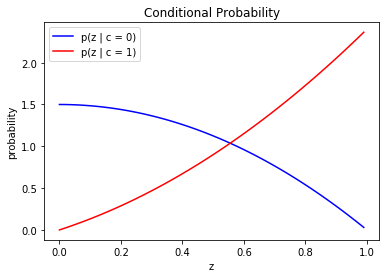

In [ ]:
"""
Plot of p(z | c = 0) and p(z | c = 1).
"""
z =np.arange(0,1,0.01)
p0 = alpha_0*(1-z*z)
p1 = alpha_1*(z+z*z)
plt.plot(z,p0, label = 'p(z | c = 0)' , color = 'blue')
plt.plot(z,p1, label = 'p(z | c = 1)' , color = 'red')
plt.xlabel('z')
plt.ylabel('probability')
plt.title('Conditional Probability')
plt.legend()
#raise NotImplementedError()

### Exercise 1.2
Use the sum and product rule to show that the probability distribution function $p(z)$ can be written as
\begin{equation} 
p(z) = \frac{(3z + 1)(z + 1)}{4} \label{prob_dist} \tag{1}.
\end{equation}

$$\begin{align*} p(z) =&  p(z|c=0)p(c=0) + p(z|c=1)p(c=1)\\ 
    = & \frac{1}{6}p(z|c=0) + \frac{5}{6}p(z|c=1) \\
    = & \frac{1}{4}(1-z^2) + (z+z^2)\\
    = & \frac{1-z^2+4z+4z^2}{4} \\
    = & \frac{(3z+1)(z+1)}{4}\end{align*}$$

### Exercise 1.3
Use Bayes' rule to compute the posterior probability distribution function $p(c|z)$.

$$\begin{align*} p(c|z) = &  \frac{p(z|c)p(c)}{p(z)}\end{align*}$$

then for c = 1, we have

$$\begin{align*} p(c = 1|z) = &  \frac{p(z|c = 1)p(c =1)}{p(z)} \\
                            = &  \frac{z+z^2}{\frac{(3z+1)(z+1)}{4}} \\
                            = &  \frac{4z}{3z+1} \end{align*}$$
                            
and for c = 0, we have

$$\begin{align*} p(c = 0|z) = &  \frac{p(z|c = 0)p(c =0)}{p(z)} \\
                            = &  \frac{\frac{1-z^2}{4}}{\frac{(3z+1)(z+1)}{4}} \\
                            = &  \frac{1-z}{3z+1} \end{align*}$$
                            
so we have, 

$$p(c|z) = \begin{cases} 
      \frac{1-z}{3z+1} & c =0 \\
      \frac{4z}{3z+1} & c=1 
   \end{cases}
$$

Plot these distributions as a function of $z$.

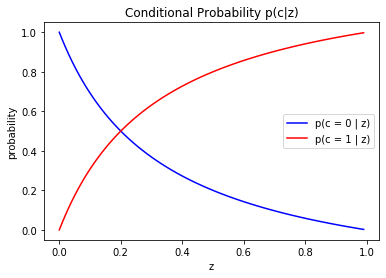

In [ ]:
"""
Plot of p(c = 0 | z), p(c = 1 | z) and decision boundary.
"""

pc0 = (1-z)/(3*z+1)
pc1 = (4*z)/(3*z+1)

plt.plot(z,pc0, label = 'p(c = 0 | z)' , color = 'blue')
plt.plot(z,pc1, label = 'p(c = 1 | z)' , color = 'red')
plt.xlabel('z')
plt.ylabel('probability')
plt.title('Conditional Probability p(c|z)')
plt.legend()
#raise NotImplementedError()

How can these posterior probabilities help in making a decision regarding the validity of the claim? Can you think of a way of using this system that makes economic sense for the company? Explain how or why not.

YOUR ANSWER HERE

### Exercise 1.4
Compute the optimal decision boundary (based on our numerical score $z$) that minimizes the misclassification rate. For which $z$ should we classify $c = 0$ (false) and for which $z$ should we classify $c = 1$ (valid)? Explain your decision.

Decision boundary is where 

$$p(c = 0|z) = p(c =1 | z)$$
therfore we have
$$\frac{1-z}{3z+1} = \frac{4z}{3z+1}$$\
$$ \implies z=\frac{1}{5} $$
 
so for values $z > \frac{1}{5}$ we set c = 1 since $p(c = 1|z) > p(c = 0|z)$\
and for values $z < \frac{1}{5}$ we set c = 0 since $p(c = 0|z) > p(c = 1|z)$

### Exercise 1.5
Compute the misclassification rate, given the optimal decision boundary determined previously. Interpret the result you have obtained. Is the $z$ score useful in determining the validity of the claim? Compare this with your prior guess from 1.1.

The misclassification rate is 
$$\begin{align*}\int_{0}^{0.2}p(𝑐=1| 𝑧) dz + \int_{0.2}^{1}p(𝑐=0| 𝑧) dz =  &\int_{0}^{0.2}\frac{4z}{3z+1} dz + \int_{0.2}^{1}\frac{1-z}{3z+1} dz \\
 = & 0.0577762 + 0.140574 \\
 = & 0.1983502
\end{align*}$$

As we see, the model has about 20% error which is accepatable!

## Exercise 2
This exercise builds on exercise 3, week 5, "Fitting a straight line to data". For a detailed description (and explanation) see _Exercises and Answers, Week 5_ in Brightspace. The final part of that exercise computed the predictive distribution after a single data point was observed. Here we consider a new data set, consisting of no less than _two_ points: $\{x_1, t_1\} = (0.4, 0.1)$ and $\{x_2, t_2\} = (0.6, -0.4)$.
### Exercise 2.1
Assume $\alpha = 1$ and $\beta = 15$. 
Compute the predictive distribution $p(t|x,\mathbf{t},\mathbf{x},\alpha,\beta)$ after these two points are observed. 

we have:
$$ \mathbf{x} = [0.4,0.6]^T$$
$$ \mathbf{t} = [0.1,-0.4]^T$$\
so :
$$[\bar{\mu_x}, \bar{ \mu_{xx}}, \bar{\mu_{t}}, \bar{\mu_{xt}}] = [0.5, 0.26, -0.15, 0.08 ]$$

therefore we can write:
$$\mathbf{\Phi^Tt} = N [\bar{\mu_t}, \bar{\mu_{xt}}] ^T = [-0.3,0.16]^T$$\
$$\mathbf{\Phi^T\Phi} = N \begin{pmatrix} 1 & \bar{\mu_x}\\ \bar{\mu_x} & \bar{\mu_{xx}}\end{pmatrix} = 
\begin{pmatrix} 2 & 1 \\ 1 & 0.52 \end{pmatrix}$$ \
$$\mathbf{S^{-1}_{N}} = \alpha\mathbf{I} + \beta \mathbf{\Phi^T\Phi} = 
 \begin{pmatrix} 31 & 15 \\ 15 & 8.8 \end{pmatrix}$$
$$\mathbf{m_{N}} = \beta \mathbf{S_N}\mathbf{\Phi^Tt} = \begin{pmatrix} -4.23214286\\ 8.44642857 \end{pmatrix}$$

and therefore:
$$m(x) = \phi(x)^T\mathbf{m_N} = -4.23214286 + 8.44642857x$$
$$s(x) = \beta^{-1} + \phi(x)^T \mathbf{S_N} \phi(x) = 0.64853556*x^2 -0.62761506*x + 0.25076708667 $$

thus, the predictive distribution would be:

$$p(t|x,\mathbf{t},\mathbf{x},\alpha,\beta) = \mathscr{N}(t|m(x),s(x))$$

Please provide the mean and variance in code as well.

In [ ]:
"""
Compute the mean and the variance of the predictive distribution.
mx : array
    The mean for an array of points.
sx : array
    The variance for an array of points.
"""
# We set x, say 101 points over the interval x = [0, 1]
x = np.linspace(0, 1, 101)
mx = -4.23214286 + 8.44642857*x
sx = 0.64853556*x**2 -0.62761506*x + 0.25076708667
#raise NotImplementedError()

In [ ]:
"""
Hidden test for mx and sx over the interval [0,1].
"""

### Exercise 2.2
Plot the mean of the predictive Gaussian distribution and one standard deviation on both sides as a function of $x$ over the interval $[0, 1]$. Plot the data in the same figure.

**Hint:** See some ideas for plotting on `example_plot1`.

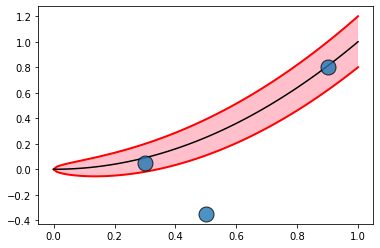

In [ ]:
def example_plot1(x):
    """
    Example for plotting a function with data points, mean and standard deviation.
    x: array of points over the interval[0, 1], e.g., x = np.linspace(0, 1, 101)
    """
    # Generate some bogus data and predictive distribution, for illustration purposes.
    # You should use your own data, functions, and std. dev!
    Xn = np.array([0.3, 0.5, 0.9])
    Tn = np.array([0.05, -0.35, 0.8])
    mx = x**2
    sx = 0.2 * np.sqrt(x)

    plt.figure(1)
    # first the m(x) +/- s(x) areas (no line)
    plt.fill_between(x, mx - sx, mx + sx, facecolor = 'pink')
    # the lines for the predictive mean m(x) and deviation s(x) around it
    plt.plot(x, mx + sx, 'r', linewidth = 2)
    plt.plot(x, mx - sx, 'r', linewidth = 2)
    plt.plot(x, mx, 'k')
    # circle the data points
    plt.plot(Xn, Tn, 'o', markeredgecolor = 'black', alpha = 0.8, linewidth = 2, markersize = 15)

example_plot1(x)

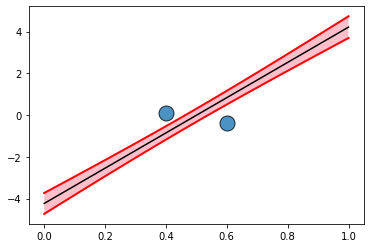

In [ ]:
"""
Plot the mean of the predictive distribution with the standard deviation and the data.
"""
def example_plot1(x):
    """
    Example for plotting a function with data points, mean and standard deviation.
    x: array of points over the interval[0, 1], e.g., x = np.linspace(0, 1, 101)
    """
    # Generate some bogus data and predictive distribution, for illustration purposes.
    # You should use your own data, functions, and std. dev!
    Xn = np.array([0.4, 0.6])
    Tn = np.array([0.1, -0.4])
    x = np.linspace(0, 1, 101)
    mx = -4.23214286 + 8.44642857*x
    sx = np.sqrt(0.64853556*x**2 -0.62761506*x + 0.25076708667)

    plt.figure(1)
    # first the m(x) +/- s(x) areas (no line)
    plt.fill_between(x, mx - sx, mx + sx, facecolor = 'pink')
    # the lines for the predictive mean m(x) and deviation s(x) around it
    plt.plot(x, mx + sx, 'r', linewidth = 2)
    plt.plot(x, mx - sx, 'r', linewidth = 2)
    plt.plot(x, mx, 'k')
    # circle the data points
    plt.plot(Xn, Tn, 'o', markeredgecolor = 'black', alpha = 0.8, linewidth = 2, markersize = 15)
    
example_plot1(x)
#raise NotImplementedError()

Compare your plot with Figure 3.8b (Bishop, p.157) and explain the difference. 

YOUR ANSWER HERE

### Exercise 2.3
Sample five functions $y(x,\mathbf{w})$ from the posterior distribution over $\mathbf{w}$ for this data set and plot them in the same graph (i.e. with the predictive distribution). You may use `np.random.multivariate_normal`.

**Hint:** See `example_plot2` for some plotting hints.

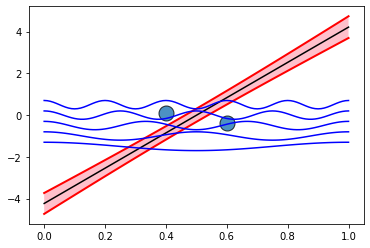

In [ ]:
def example_plot2(x):
    """
    Example for plotting random functions together with the previous plot (example_plot1).
    x: array of points over the interval [0, 1], e.g., x = np.linspace(0, 1, 101)
    """
    example_plot1(x)
    
    # five made-up functions, again only for illustration purposes
    # You should generate your own functions for the second plot!
    for i in range(5):
        # NB: These are not the functions that you need!
        y = np.cos(2 * np.pi * (i+1) * x) / 5 + (i - 3) / 2
        plt.plot(x, y, 'b', linewidth = 1.5)

example_plot2(x)

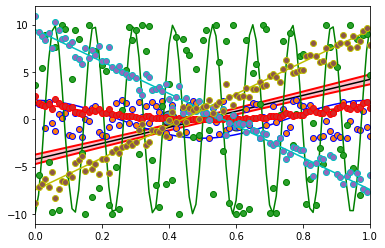

In [ ]:
"""
Plot the previous graph with 5 sample functions.
"""
def example_plot2(x):
    """
    Example for plotting random functions together with the previous plot (example_plot1).
    x: array of points over the interval [0, 1], e.g., x = np.linspace(0, 1, 101)
    """
    example_plot1(x)
    
    # five made-up functions, again only for illustration purposes
    # You should generate your own functions for the second plot!
    mm = np.array([0.4, 0.6])
    sx = 0.64853556*x**2 -0.62761506*x + 0.25076708667
    cov = sx*np.eye(len(sx),len(sx))
    z = np.random.multivariate_normal(mx, cov)
    
    y = 2*np.cos(2 * np.pi  * x) 
    plt.plot(x, y, 'b', linewidth = 1.5)
    plt.plot(x, 2*np.cos(2 * np.pi  * z) , 'o', markeredgecolor = 'b')
    
    y = 10*np.sin(2 * np.pi  * mx) 
    plt.plot(x, y, 'g', linewidth = 1.5)
    plt.plot(x, 10*np.sin(2 * np.pi  * z) , 'o', markeredgecolor = 'g')
    
    y = mx**2/10
    plt.plot(x, y, 'r', linewidth = 1.5)
    plt.plot(x, z**2/10 , 'o', markeredgecolor = 'r')
    
    y = -2*mx + 1
    plt.plot(x, y, 'c', linewidth = 1.5)
    plt.plot(x, -2*z+1 , 'o', markeredgecolor = 'c')
    
    y = 2*mx + 1
    plt.plot(x, y, 'y', linewidth = 1.5)
    plt.plot(x, 2*z+1 , 'o', markeredgecolor = 'y')
    plt.xlim([0,1])

example_plot2(x)
#raise NotImplementedError()

## Exercise 3
### Part 1: Obtaining the prior
Consider a four dimensional variable $[x_1, x_2, x_3, x_4]^T$, distributed according to a multivariate Gaussian with mean $\tilde{\mathbf{\mu}} = [1,0,1,2]^T$ and covariance matrix $\tilde{\mathbf{\Sigma}}$ given as
\begin{equation}
    \tilde{\mathbf{\Sigma}} =
    \left(\begin{array}{cc|cc} 
    0.14 & -0.3 & 0.0 & 0.2 \\ 
    -0.3 & 1.16 & 0.2 & -0.8 \\ \hline 
    0.0 & 0.2 & 1.0 & 1.0 \\ 
    0.2 & -0.8 & 1.0 & 2.0 \end{array}\right)
    \label{mat}
    \tag{2}
\end{equation}
We are interested in the conditional distribution over $[x_1, x_2]^T$, given that $x_3 = x_4 = 0$. We know this conditional distribution will also take the form of a Gaussian:
\begin{equation}
    p\big([x_1,x_2]^T \,|\, x_3 = x_4 = 0 \big) = \mathcal{N}([x_1,x_2]^T | \mathbf{\mu}_p, \mathbf{\Sigma}_{p})
    \label{prior}
    \tag{3}
\end{equation}
for which the mean and covariance matrix are most easily expressed in terms of the (partitioned) precision matrix (see Bishop,$\S2.3.1$).
#### Part 1.1
Use the partitioned precision matrix $\tilde{\mathbf{\Lambda}} = \tilde{\mathbf{\Sigma}}^{-1}$ to give an explicit expression for the mean $\mathbf{\mu}_p$ and covariance matrix $\mathbf{\Sigma}_p$ of this distribution and calculate their values. (This distribution will be taken as the _prior_ information for the rest of this exercise, hence the subscript $p$). You may use `np.linalg.inv` to calculate matrix inverses.


$$\begin{align*} p\big([x_1,x_2]^T \,|\, x_3 = x_4 = 0 \big) =&  -\frac{1}{2}[x_1-1,x_2]^T  \begin{pmatrix} -15.7267 & -4.0672\\ -4.0672 & -0.1898 \end{pmatrix} [x_1-1,x_2]\\ 
    = & -\frac{1}{2}[x_1-1,x_2]^T [-15.7267 x_1 - 15.7267 -4.0672 x_2 , -4.0672 x_1 + 4.0672 -0.1898 x_2 ] \\
    = &  8.8638x_1^2 +0.0949 x_2^2 - 4.0672x_2 + 4.0672x_2x_1 -8.8638\end{align*}$$

Please provide $\mathbf{\mu}_p$ and $\mathbf{\Sigma}_p$ in code as well.

In [ ]:
"""
Calculate the mean and covariance. Note: mu is a column vector.
mu_p : array
    The mean.
Sigma_p : matrix
    The covariance.
"""
mu_p = np.array([1,0])
Sigma_p =np.array([[0.14,-0.3],[-0.3,1.16]])
#raise NotImplementedError()

In [ ]:
"""
Hidden test for checking the value of mu_p and Sigma_p.
"""

'\nHidden test for checking the value of mu_p and Sigma_p.\n'

#### Part 1.2
Create a function that can generate random number pairs, distributed according to the distribution in \eqref{prior}.
Initialize your random generator and then draw a $single$ pair
    \begin{equation}
    \mathbf{\mu}_t = [\mu_{t_1}, \mu_{t_2}]^T
    \label{mu_t}
    \tag{4}
\end{equation}
from this distribution. (These will be the _true_ means, hence the subscript $t$).

**Hint**: You can use the function `np.random.multivariate_normal`.

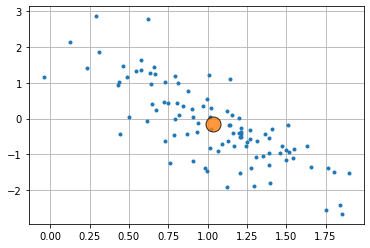

In [ ]:
"""
Plot of the randomly generated number pairs and the 'true' means.
"""
z= np.random.multivariate_normal(mu_p,Sigma_p,100).T
plt.plot(z[0],z[1],'.')
mu_t=[np.mean(z[0]), np.mean(z[1])]
plt.plot(np.mean(z[0]), np.mean(z[1]), 'o', markeredgecolor = 'black', alpha = 0.8, linewidth = 2, markersize = 15)
plt.grid()
#raise NotImplementedError()


#### Part 1.3
Make a plot of the probability density of the distribution \eqref{prior}.

**Hint**: use the function `ss.multivariate_normal` to calculate the probability density of a multivariate Gaussian random variable. The functions `np.mgrid` and `Axes3D.plot_surface` may also prove useful.

Text(0.5, 0, 'x2')

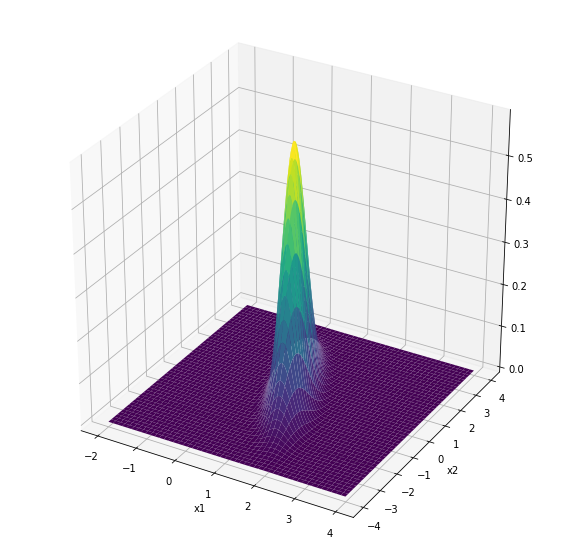

In [ ]:
"""
Plot of the probability density.
"""
x, y = np.mgrid[-2:4:0.01, -4:4:0.01]
pos = np.dstack((x, y))
rv = ss.multivariate_normal(mu_p, Sigma_p)

fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,rv.pdf(pos),cmap=plt.cm.viridis)
plt.xlabel('x1')
plt.ylabel('x2')
#raise NotImplementedError()

### Part 2: Generating the data
Here we assume we are dealing with a 2d-Gaussian data generating process 
\begin{equation}
p(\mathbf{x}) = \mathcal{N}(\mathbf{x} | \mathbf{\mu}, \mathbf{\Sigma}) \label{data} \tag{5}
\end{equation}
For the mean $\mathbf{\mu}$, we will use the value $\mathbf{\mu}_t$ drawn in \eqref{mu_t} in order to _generate_ the data. Subsequently, we will pretend that we do not know this "true" value $\mathbf{\mu}_t$ of $\mathbf{\mu}$, and estimate $\mathbf{\mu}$ from the data. For the covariance matrix $\mathbf{\Sigma}$ we will use the "true" value
\begin{equation}
    \mathbf{\Sigma}_t = \left(\begin{array}{cc} 2.0 & 0.8 \\ 0.8 & 4.0 \end{array} \right) \label{VarD} \tag{6}
\end{equation}
to generate the data.
#### Part 2.1
Generate at least 1000 data pairs $\{x_i, y_i\}$, distributed according to equation \eqref{data} with $\mathbf{\mu} = \mathbf{\mu}_t$ and $\mathbf{\Sigma} = \mathbf{\Sigma}_t$ and save them to file in a plain-text format. **Hint**: Use function `np.savetxt`.

In [ ]:
"""
Generate 1000 data pairs.
"""
mu_p = np.array([1,0])
Sigma_p =np.array([[2.0,0.8],[0.8,4.0]])
z= np.random.multivariate_normal(mu_t,Sigma_p,1000).T
x= z[0]; y=z[1]
np.savetxt('data.txt',(x,y),delimiter='\n')
#raise NotImplementedError()

#### Part 2.2
From now on, we will assume (pretend) the "true" mean $\mathbf{\mu}_t$ is unknown and estimate $\mathbf{\mu}$ from the data. Calculate the maximum likelihood estimate of $\mathbf{\mu}_{\mathrm{ML}}$ and $\mathbf{\Sigma}_{\mathrm{ML}}$ for the data, and also an unbiased estimate of $\mathbf{\Sigma}$ (see Bishop, $\S2.3.4$). **Hint**: Use function `np.loadtxt`.

In [ ]:
"""
Calculate the maximum likelihood estimate.
"""
z=np.loadtxt('data.txt')
h= int(len(z)/2)
x=z[0:h]
y=z[h:]

mu_ML = [np.mean(x),np.mean(y)]
x1 = x - mu_ML[0] 
y1 = y - mu_ML[1] 

Sigma_ML = np.array([[np.mean(x1**2) , np.mean(x1*y1)],
                [np.mean(x1*y1) , np.mean(y1**2)]])
print(mu_ML)
print(mu_t)
Sigma_ML
#raise NotImplementedError()

[1.0201941643813206, -0.13759072240873282]
[1.0353204783125902, -0.16390173087615306]


array([[1.8219466 , 0.90402718],
       [0.90402718, 4.15780802]])

Compare with the true values $\mathbf{\mu}_t$ and $\mathbf{\Sigma}_t$.

roughly speaking, they are equal. \
$\begin{align*} \mu_t = [0.9112, 0.1300]\end{align*} $ and $\begin{align*} \mu_{ML} = [0.9647, 0.1300]\end{align*}$
in addition,\\

$\begin{align*} \Sigma_t = \begin{pmatrix} 2 & 0.8\\ 0.8 & 4.0 \end{pmatrix}\end{align*} $ and $\begin{align*} \Sigma_{ML} = \begin{pmatrix} 1.8769 & 0.7945\\ 0.7945 & 3.9650 \end{pmatrix}\end{align*}$

 

### Part 3: Sequential learning algorithms
We will now estimate the mean $\mathbf{\mu}$ from the generated data and the known variance $\mathbf{\Sigma}_{t}$ _sequentially_, i.e., by considering the data points one-by-one.
#### Part 3.1
Write a procedure that processes the data points $\{\mathbf{x}_n\}$ in the generated file one-by-one, and after each step computes an updated estimate of $\mathbf{\mu}_{\mathrm{ML}}$, the maximum likelihood of the mean (using Bishop, eq.2.126).

In [ ]:
"""
Calculate the maximum likelihood of the mean.
"""
x_seq = []
x_seq.append(x[0])
xx = x[0]

y_seq = []
y_seq.append(y[0])
yy = y[0]

for i in range(1,h):
    xx = xx + 1/i * ( x[i] - xx)
    x_seq.append(xx)
    yy = yy + 1/i * ( y[i] - yy)
    y_seq.append(yy)

i = range(h) 
print(x_seq[-1], y_seq[-1])
print(np.mean(x),np.mean(y))
#raise NotImplementedError()

1.020126163230631 -0.13648183108019277
1.0201941643813206 -0.13759072240873282


YOUR ANSWER HERE

Now we also use the prior information $p(\mathbf{\mu}) = \mathcal{N}(\mathbf{\mu} | \mathbf{\mu}_p, \mathbf{\Sigma}_p)$. From the prior, the generated data and the known variance $\mathbf{\Sigma}_t$, we will estimate the mean $\mathbf{\mu}$.
#### Part 3.2
Work out the details of sequential Bayesian inference (see eq.2.144) for the mean $\mathbf{\mu}$. Apply Bayes' theorem in eq. 2.113-2.117 at each step $n=1,\dots,N$ to compute the new posterior mean $\mathbf{\mu}^{(n)}$ and covariance $\mathbf{\Sigma}^{(n)}$ after a new point $(\mathbf{x}_n)$ has arrived from the old posterior mean $\mathbf{\mu}^{(n-1)}$ and covariance $\mathbf{\Sigma}^{(n-1)}$. Use this updated posterior as the prior in the next step. The first step starts from the original prior \eqref{prior}.

Note: do not confuse the posterior $\mathbf{\Sigma}^{(n)}$ with the known $\mathbf{\Sigma}_t$ of the data generating process. For some more hints, see appendix.

YOUR ANSWER HERE

#### Part 3.3
Write a procedure that processes the data points $\{\mathbf{x}_n\}$ in the generated file one-by-one, and after each step computes an updated estimate of $\mathbf{\mu}_{\mathrm{MAP}}$ - the maximum of the posterior distribution, using the results of the previous exercise.

In [ ]:
"""
Calculate the MAP of the mean.
"""
# YOUR CODE HERE
raise NotImplementedError()

#### Part 3.4
Plot both estimates (ML and MAP) in a single graph (1d or 2d) as a function of the number of data points observed. Indicate the true values $\{\mu_{t_1}, \mu_{t_2}\}$ as well. Evaluate your result.

Make sure you store the values for $\mathbf{\mu}_{\mathrm{ML}}$ and $\mathbf{\mu}_{\mathrm{MAP}}$ at each intermediate step $n$ and use these to plot against each other. Useful graphs to get an impression of the convergence behaviour are:
* lineplots of components of $\mathbf{\mu}_{\mathrm{ML}}^{(n)}$ and $\mathbf{\mu}_{\mathrm{MAP}}^{(n)}$ vs. $n$,
* 2D-plot joining points ($\mathbf{\mu}_{\mathrm{ML}}^{(n)}$, $\mathbf{\mu}_{\mathrm{ML}}^{(n+1)}$) for successive $n$,
* combinations of $\mathbf{\mu}_{\mathrm{ML}}$ and $\mathbf{\mu}_{\mathrm{MAP}}$ components in a single plot,
* the final posterior distribution.

In [ ]:
"""
Plots of ML and MAP estimates.
"""
# YOUR CODE HERE
raise NotImplementedError()

Now evaluate what you see on the plots.

YOUR ANSWER HERE

## Hints
Below are some hints for Exercise 3 - Part 3 - Question 2.

Bayes rule is also valid if earlier acquired information is taken into account. For example, if this is earlier seen data $D_{n-1} = \{x_1, \ldots, x_{n-1}\}$. Bayes rule conditioned on this earlier data is 
$$P(\mu|x_{n},D_{n-1}) \propto P(\mu|D_{n-1}) P(x_{n}|\mu,D_{n-1}).$$
Since $D_{n} = \{x_1, \ldots, x_{n}\}$ this is written more conveniently as
$$P(\mu|D_n) \propto P(\mu|D_{n-1}) P(x_{n}|\mu,D_{n-1}).$$
If given the model parameters $\mu$, the probability distribution of $x_n$ is independent of earlier data $D_{n-1}$, we can further reduce this to
$$P(\mu|D_{n}) \propto P(\mu|D_{n-1}) P(x_{n}|\mu).$$
You should be able to see the relation with (2.144) and see in particular that the factor between square brackets in (2.144) is to be identified with $P(\mu|D_{n-1})$.

Another important insight is that if $P(\mu|D_{n-1})$ and $P(x_{n}|\mu)$ are of the form (2.113) and (2.114), 
i.e., if $P(\mu|D_{n-1})$ is a Gaussian distribution over $\mu$ with a certain mean and covariance (you are free to give these any name, e.g. $\mu^{(n-1)}$, $\Sigma^{(n-1)}$) and if $P(x_{n}|\mu)$ is also Gaussian with a mean that is linear $\mu$, then you can use (2.116) and (2.117) to compute the posterior $P(\mu|D_{n})$, which therefore is also Gaussian.
 
So it is your task to show this. To do this you have to figure out the mapping of the variables and parameters in the current exercise, i.e. what is the correspondence between $\mu, x_n, \Sigma_t, \mu^{(n-1)}, \Sigma^{(n-1)}$ etc. with $x,\mu,\Lambda, y,A,b,L$. Don't forget that some quantities can also be zero or and other may be identity matrices.